# Analyzing Sample Superstor Dataset

In [1]:
# Installing readxl package to read excel file
install.packages("readxl")
library("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Reading excel file and checking first 6 records
df <- read_excel("/content/Sample - Superstore.xls")
head(df)

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,⋯,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


In [4]:
# checking the structure of dataset
str(df)

tibble [9,994 × 21] (S3: tbl_df/tbl/data.frame)
 $ Row ID       : num [1:9994] 1 2 3 4 5 6 7 8 9 10 ...
 $ Order ID     : chr [1:9994] "CA-2017-152156" "CA-2017-152156" "CA-2017-138688" "US-2016-108966" ...
 $ Order Date   : POSIXct[1:9994], format: "2017-11-08" "2017-11-08" ...
 $ Ship Date    : POSIXct[1:9994], format: "2017-11-11" "2017-11-11" ...
 $ Ship Mode    : chr [1:9994] "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer ID  : chr [1:9994] "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Customer Name: chr [1:9994] "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ Segment      : chr [1:9994] "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country      : chr [1:9994] "United States" "United States" "United States" "United States" ...
 $ City         : chr [1:9994] "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State        : chr [1:9994] "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal Code  : num [

In [5]:
# Checking the statistical summary of dataset
summary(df)

     Row ID       Order ID           Order Date                    
 Min.   :   1   Length:9994        Min.   :2015-01-03 00:00:00.00  
 1st Qu.:2499   Class :character   1st Qu.:2016-05-23 00:00:00.00  
 Median :4998   Mode  :character   Median :2017-06-26 00:00:00.00  
 Mean   :4998                      Mean   :2017-04-30 05:17:08.05  
 3rd Qu.:7496                      3rd Qu.:2018-05-14 00:00:00.00  
 Max.   :9994                      Max.   :2018-12-30 00:00:00.00  
                                                                   
   Ship Date                      Ship Mode         Customer ID       
 Min.   :2015-01-07 00:00:00.0   Length:9994        Length:9994       
 1st Qu.:2016-05-27 00:00:00.0   Class :character   Class :character  
 Median :2017-06-29 00:00:00.0   Mode  :character   Mode  :character  
 Mean   :2017-05-04 04:17:20.2                                        
 3rd Qu.:2018-05-18 00:00:00.0                                        
 Max.   :2019-01-05 00:00:00.0

In [6]:
# checking null values if any
any(is.null(df))

[1] FALSE

In [7]:
# Installing ggplot2 & dplyr for visualization & EDA
install.packages("ggplot2")
install.packages("dplyr")
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




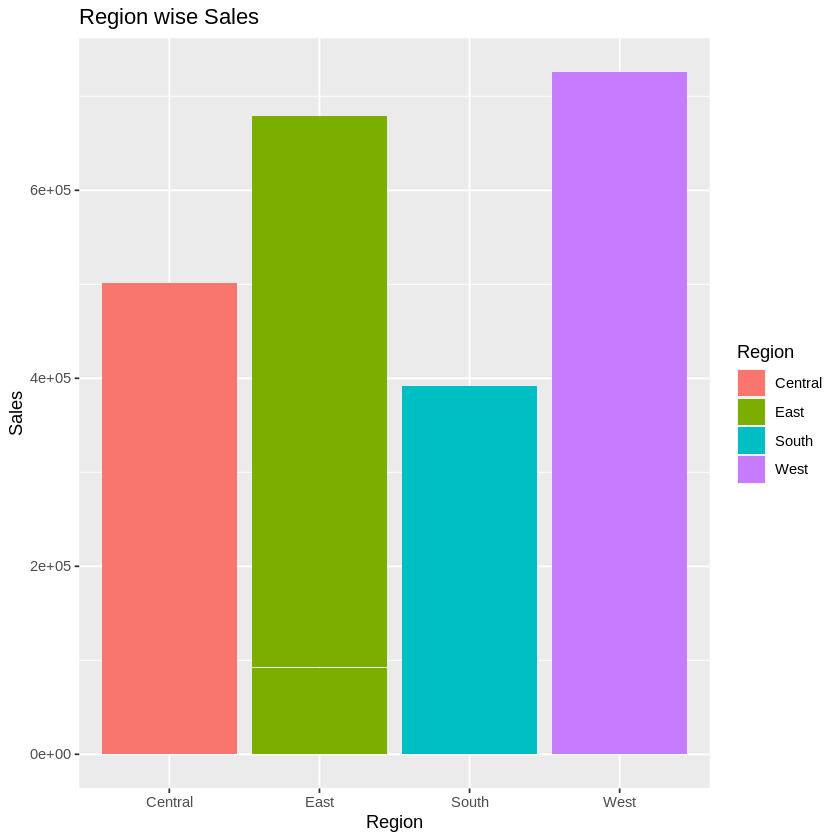

In [8]:
# Region wise sales data
g = ggplot(df,aes(x=Region,y=Sales,fill=Region)) + geom_bar(stat = "identity")+
  labs(title = "Region wise Sales",x="Region",y="Sales")
g

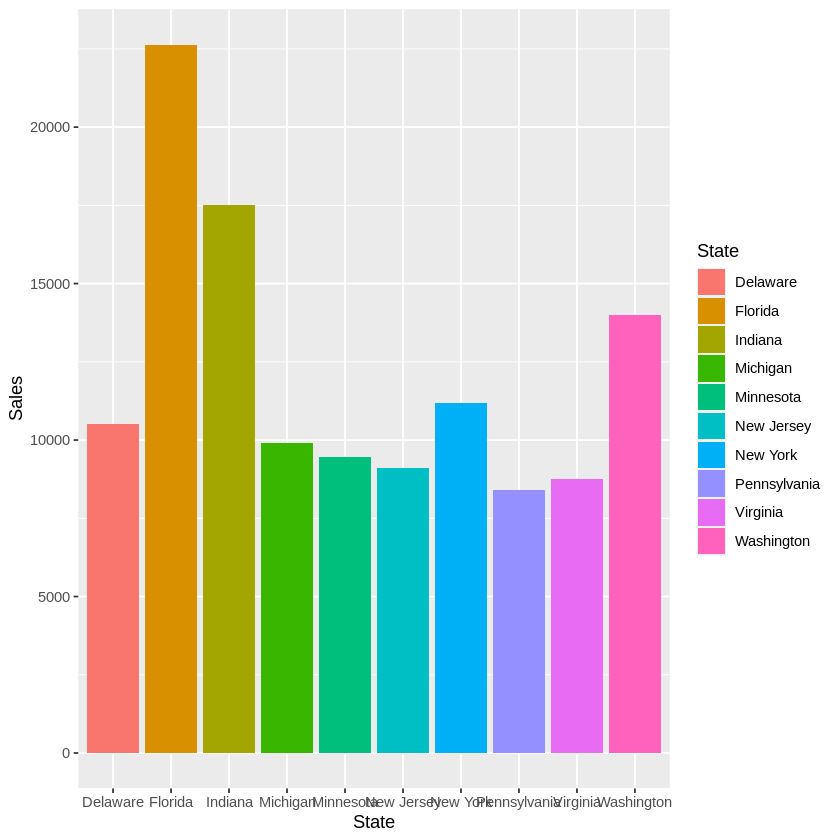

In [9]:
# Top 10 states whose sales are more
top_10_state = arrange(df,desc(df$Sales))[1:10,]
g = ggplot(top_10_state,aes(x=State,y=Sales,fill=State)) + geom_bar(stat = "identity")
g

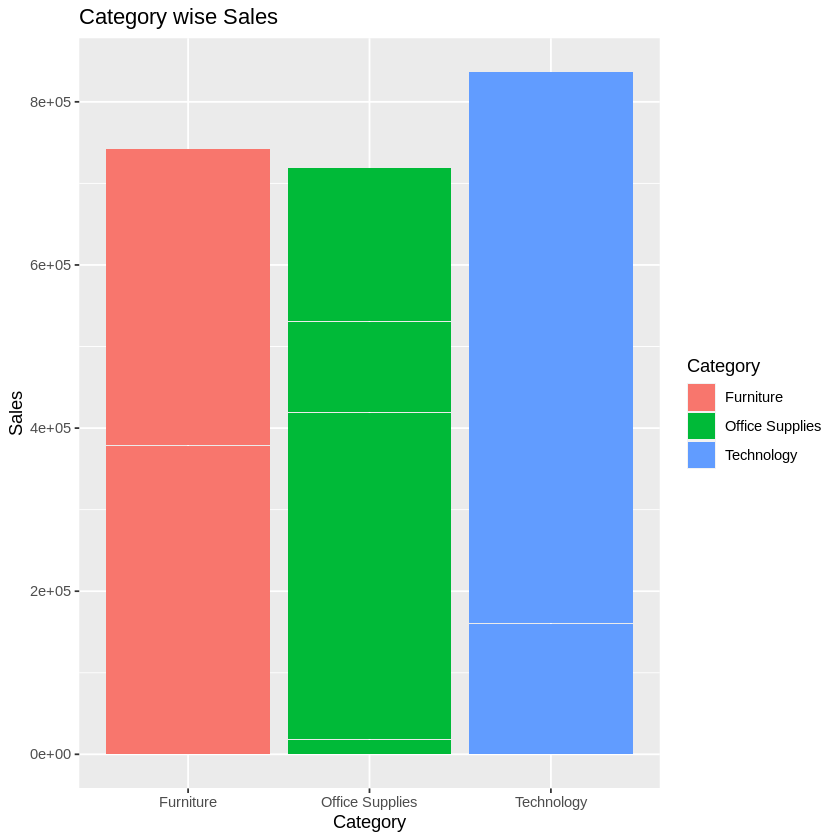

In [10]:
# Category wise Sales
g = ggplot(df,aes(x=Category,y=Sales,fill=Category)) + geom_bar(stat = "identity")+
  labs(title = "Category wise Sales")
g

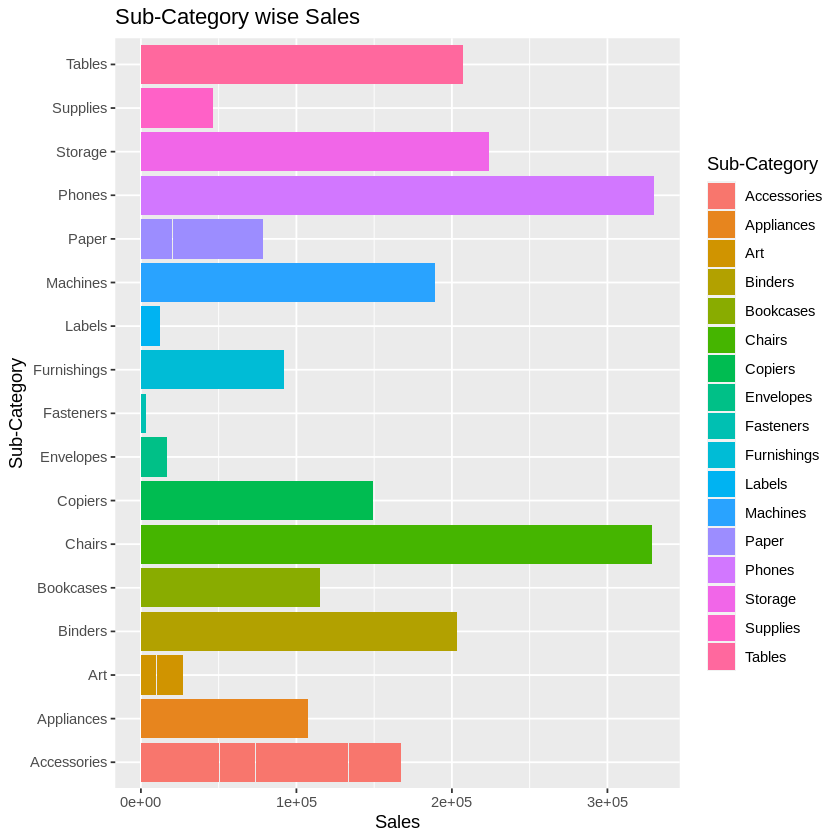

In [11]:
# Sub-Category Wise Sales
g = ggplot(df,aes(x=.data[["Sub-Category"]],y=Sales,fill=.data[["Sub-Category"]])) + geom_bar(stat = "identity")+
  labs(title = "Sub-Category wise Sales") + coord_flip()
g

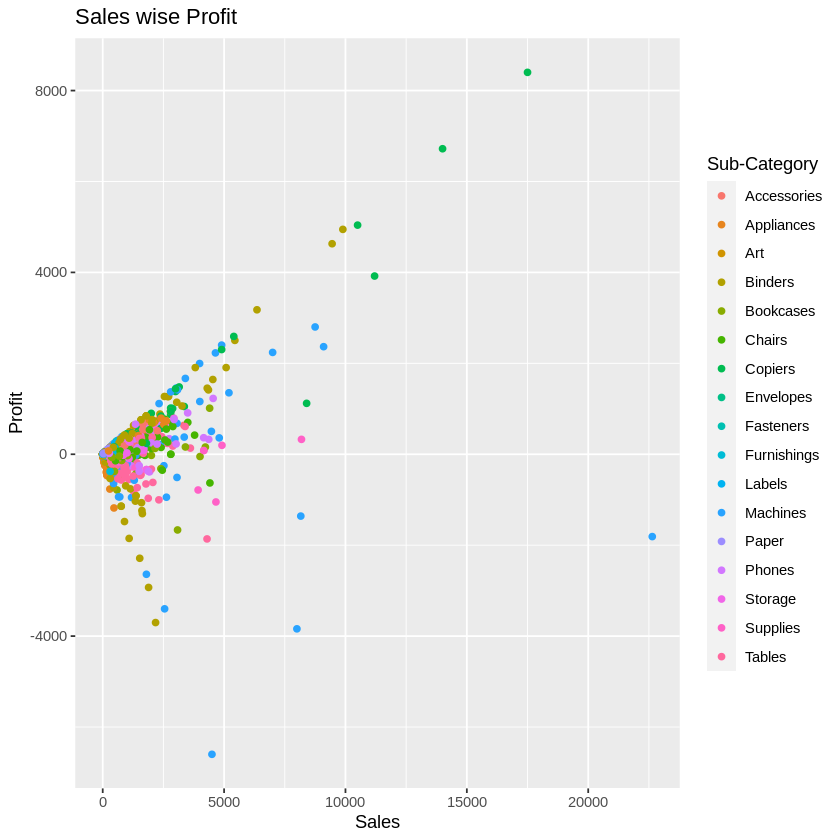

In [12]:
# Sales wise Profit
g = ggplot(df,aes(x=Sales,y=Profit,color=.data[["Sub-Category"]])) + geom_point()+
  labs(title = "Sales wise Profit")
g

In [13]:
# Seeing losses
filter(df,Profit<0) %>% arrange(Profit)

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,⋯,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
<dbl>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7773,CA-2017-108196,2017-11-25,2017-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,⋯,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
684,US-2018-168116,2018-11-04,2018-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,⋯,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
9775,CA-2015-169019,2015-07-26,2015-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,⋯,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3012,CA-2018-134845,2018-04-17,2018-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,⋯,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
4992,US-2018-122714,2018-12-07,2018-12-13,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,⋯,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3152,CA-2016-147830,2016-12-15,2016-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,⋯,43055,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
5311,CA-2018-131254,2018-11-19,2018-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,⋯,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,1525.188,6,0.8,-2287.7820
9640,CA-2016-116638,2016-01-28,2016-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,⋯,28027,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,4297.644,13,0.4,-1862.3124
1200,CA-2017-130946,2017-04-08,2017-04-12,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,⋯,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464


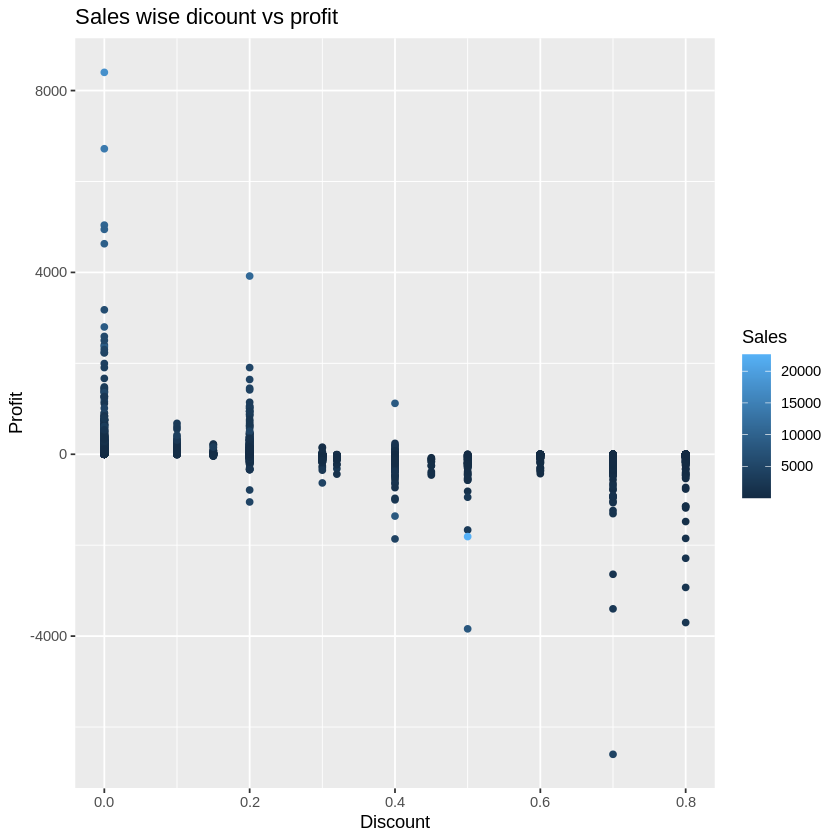

In [14]:
# Sales wise discount vs profit
g = ggplot(df,aes(x=Discount,y=Profit,color=.data[["Sales"]])) + geom_point()+
  labs(title = "Sales wise dicount vs profit")
g

Warning message:
“Use of `values[[2]]` is discouraged.
ℹ Use `.data[[2]]` instead.”
Warning message:
“Use of `values[[1]]` is discouraged.
ℹ Use `.data[[1]]` instead.”


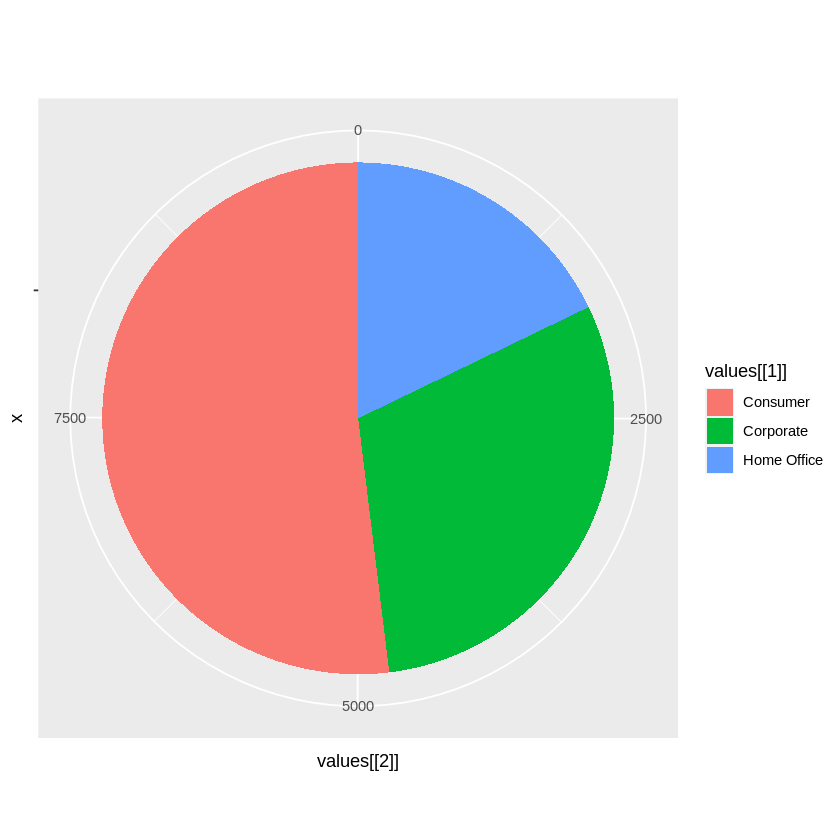

In [15]:
# Segment wise count in pie chart
values = count(df,Segment)
g = ggplot(values, aes(x="", y=values[[2]], fill=values[[1]])) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) + 
  labs(title = "") 
g

In [16]:
# Maximum Discount on Category
a = df %>% group_by(df[["Category"]]) %>% summarise(Tot_Disc=max(Discount))
a

"df[[""Category""]]",Tot_Disc
<chr>,<dbl>
Furniture,0.7
Office Supplies,0.8
Technology,0.7


In [18]:
# adding one more column to see delivery time in days
df["delivery_time"] = difftime(df$`Ship Date`,df$`Order Date`, units = "days")

In [20]:
colnames(df)

[1] "Row ID"        "Order ID"      "Order Date"    "Ship Date"    
 [5] "Ship Mode"     "Customer ID"   "Customer Name" "Segment"      
 [9] "Country"       "City"          "State"         "Postal Code"  
[13] "Region"        "Product ID"    "Category"      "Sub-Category" 
[17] "Product Name"  "Sales"         "Quantity"      "Discount"     
[21] "Profit"        "delivery_time"

In [19]:
# Seeing the top 10 customer whose delivery is late multiple times
a=select(filter(df,as.integer(df[["delivery_time"]])>6),c(`Customer Name`,`delivery_time`))
b=count(a,`Customer Name`)
arrange(b,desc(n))[1:10,]

Customer Name,n
<chr>,<int>
Katherine Murray,11
Kunst Miller,11
Arthur Prichep,8
Kean Takahito,8
Nick Radford,8
Bart Watters,7
Cassandra Brandow,7
Edward Hooks,7
Liz Preis,7
